# Review and Continues
* 目前一共介紹過以下幾種資料處理的情形
    1. 計算每一種items或values的出現次數
    2. 算總和、算平均
    3. 找到最大值、找到擁有最大值的那些項目
    4. 根據數值或項目來分類
* 目前會存取JSON、CSV檔，但是CSV檔的讀取還沒教
* Youbike Case
    * 讀取資料內的數值
    * 找到滿載或者沒車的腳踏車站
    * 針對一天或一週的腳踏車資料，累計每一時刻的on-site腳踏車數量（sbi），並計算每一小時的平均腳踏車數。
    * 利用Google Fusion Table將腳踏車的資料繪製在地圖上
* Air Quality Case
    * 讀取資料內的PM2.5數值
    * 找到PM2.5嚴重的區域
    * 將PM2.5照空品監測網的尺度標準對應到相對應的尺度。
* Using Google Fusion Tables

# Read csv file
* 空氣品質的資料只有各種數值，但卻沒有地理位置，如果要將空氣品質plot在地圖上，需要[空氣品質監測站基本資料(含地理圖資)](http://data.gov.tw/node/6075)。他上面附好幾種資料型態，XML、JSON、CSV和地理圖資KML、SHP，這次我們要讀取CSV檔。
* 這次我們把它下載下來本地端（也就是你的電腦內）再進行讀取，順便解釋一下path的概念。

In [ ]:
# Open csv file to get data
with open('../PSS/_data/AQXSite.csv', 'r') as fin:
    print fin
    data = fin.read().decode('utf-8')
    print data

In [ ]:
# print data
rows = data.split('\n')
print len(rows)

In [ ]:
for row in rows:
    cells = row.split(',')  
    try:
        print cells[0], cells[6], cells[7]
    except:
        print "ERROR EVENT", cells

# Data Analytic - Finding nearest ubike sites

In [ ]:
import urllib
import json
import gzip
url = 'http://opendata.epa.gov.tw/ws/Data/AQXSite/?format=csv&ndctype=CSV&ndcnid=6075'
uh = urllib.urlopen(url)
# url = 'http://data.taipei/youbike'
# fin = urllib.urlopen(url)
# urllib.urlretrieve(url, "data.gz")

# data_str = gzip.open('data.gz', 'r').read()
# bike_data = json.loads(data_str)
# print bike_data['retVal'].values()[0]

In [ ]:
import simplejson, urllib
olat, olng = 25.0254571, 121.5273658
dlat, dlng = 25.023884, 121.553161
url = "http://maps.googleapis.com/maps/api/distancematrix/json?origins=%s,%s&destinations=%s,%s&mode=driving&language=en-EN&sensor=false"%(
    olat, olng,
    dlat, dlng)
print url
result= simplejson.load(urllib.urlopen(url))
print result
driving_time = result['rows'][0]['elements'][0]['duration']['value']
print driving_time

In [ ]:
import urllib
import json
serviceurl = 'http://maps.googleapis.com/maps/api/geocode/json?'

address = raw_input('Enter location: ')

url = serviceurl + urllib.urlencode({'sensor':'false', 'address': address})
print 'Retrieving', url
uh = urllib.urlopen(url)
data_str = uh.read()
data = json.loads(data_str)
print type(data)

lat = data['results'][0]['geometry']['location']['lat']
lng = data['results'][0]['geometry']['location']['lng']

print 'lat',lat,'lng',lng

# Visualized by matplotlib
* QUERY "python plot" and get the first result http://matplotlib.org/
* "MONKEY SEE, MONKEY DO!" Observe from the belows
    * http://matplotlib.org/examples/lines_bars_and_markers/fill_demo.html
    * http://matplotlib.org/1.4.1/users/pyplot_tutorial.html
* The Essentials to plot
    * import a package to plot
    * Send __list__ to plot()
    * show() it
## the first case of plotting by matplotlib

In [16]:
import datetime
print type(datetime.datetime.now())
print type(datetime.datetime.now().strftime("%Y%m%d%H%M%S"))

<type 'datetime.datetime'>
<type 'str'>


In [17]:
import urllib
import json
import gzip
import time

url = 'http://data.taipei/youbike'


for i in range(6):
    urllib.urlretrieve(url, "data.gz")
    data = gzip.open('data.gz', 'r')
    bike_data = json.load(data)
    json.dump(bike_data, open("%s.json"%datetime.datetime.now().strftime("%Y%m%d%H%M%S"), 'w'))
    time.sleep(1)
    print datetime.datetime.now().strftime("%Y%m%d%H%M%S")

20160831104346
20160831104347
20160831104348
20160831104350
20160831104351
20160831104352


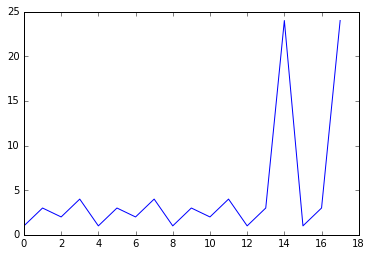

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
alist = [1, 3, 2, 4, 1, 3, 2, 4, 1, 3, 2, 4, 1, 3, 24, 1, 3, 24]
xlist = range(len(alist))
plt.plot(xlist, alist)
plt.show()

## Plotting sum of sbi for each timestamp

In [4]:
# load json data
import json

with open('../PSS/_data/merged_Youbike_list.json', 'r') as fin:
    udata = json.load(fin)
    print type(udata)

<type 'list'>


In [33]:
print len(udata)
sbi_list = []
for data in udata:
#     sbi_sum = 0
#     for site in data:
#         sbi_sum += int(site['sbi'])
    sbi_sum = sum([int(site['sbi']) for site in data])
    sbi_list.append(sbi_sum)
#     print sbi_sum
# print [sum([int(site['sbi']) for site in data]) for data in udata]
print sbi_list

288
[4007, 4020, 4036, 4046, 4085, 4076, 4102, 4163, 4174, 4202, 4197, 4165, 4233, 4224, 4239, 4282, 4291, 4301, 4307, 4317, 4341, 4374, 4402, 4410, 4434, 4443, 4440, 4460, 4462, 4470, 4474, 4466, 4482, 4490, 4498, 4503, 4514, 4520, 4546, 4585, 4614, 4634, 4645, 4636, 4639, 4668, 4714, 4769, 4785, 4836, 4858, 4856, 4874, 4904, 4905, 4947, 4982, 4980, 4997, 4993, 4989, 4997, 5010, 5011, 5027, 5016, 5018, 5035, 5041, 5043, 5043, 5045, 5041, 5006, 4973, 4961, 4916, 4891, 4873, 4814, 4750, 4724, 4627, 4571, 4562, 4485, 4373, 4397, 4322, 4289, 4281, 4215, 4197, 4196, 4132, 4154, 4114, 4047, 3992, 3972, 3976, 3948, 3956, 3889, 3882, 3916, 3973, 4054, 4146, 4171, 4173, 4185, 4149, 4143, 4155, 4173, 4130, 4133, 4097, 4051, 4042, 4104, 4123, 4016, 3987, 3950, 4009, 3999, 4057, 4052, 3996, 4034, 4064, 4002, 3964, 3971, 3900, 3891, 3893, 3891, 3850, 3833, 3747, 3697, 3645, 3516, 3392, 3400, 3291, 3281, 3286, 3259, 3248, 3248, 3290, 3321, 3283, 3251, 3301, 3394, 3422, 3384, 3530, 3563, 3546, 3552,

2774


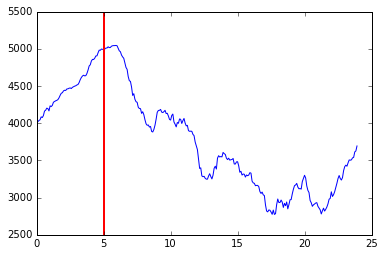

In [52]:
xlist = []
for i in range(len(sbi_list)):
    xlist.append(i/12.0)
# xlist = [i/12.0 for i in range(len(sbi_list))]

plt.plot(xlist, sbi_list)
print min(sbi_list)
plt.axvline(x=5, linewidth=2, color='r')
plt.show()

In [21]:
print '\\'
print r'\\'
print r'\t\t'
print '''
Last login: Thu Sep  1 09:22:58 on ttys001
-bash: /Users/jirlong/Library/Enthought/Canopy_64bit/User/bin/activate: No such file or directory
jirlongdeMacBook-Air:~ jirlong$ conda list
# packages in environment at //anaconda:
#
Using Anaconda Cloud api site https://api.anaconda.org
_nb_ext_conf              0.2.0                    py27_0  
wikipedia                 1.4.0                    py27_0    akode
alabaster                 0.7.8                    py27_0  
anaconda                  4.1.1               np111py27_0  
anaconda-client           1.4.0                    py27_0  
anaconda-navigator        1.2.1                    py27_0  
appnope                   0.1.0                    py27_0  
appscript                 1.0.1                    py27_0  
argcomplete               1.0.0                    py27_1  
astropy                   1.2.1               np111py27_0  
babel                     2.3.3                    py27_0  
'''

\
\\
\t\t


'\nLast login: Thu Sep  1 09:22:58 on ttys001\n-bash: /Users/jirlong/Library/Enthought/Canopy_64bit/User/bin/activate: No such file or directory\njirlongdeMacBook-Air:~ jirlong$ conda list\n# packages in environment at //anaconda:\n#\nUsing Anaconda Cloud api site https://api.anaconda.org\n_nb_ext_conf              0.2.0                    py27_0  \nwikipedia                 1.4.0                    py27_0    akode\nalabaster                 0.7.8                    py27_0  \nanaconda                  4.1.1               np111py27_0  \nanaconda-client           1.4.0                    py27_0  \nanaconda-navigator        1.2.1                    py27_0  \nappnope                   0.1.0                    py27_0  \nappscript                 1.0.1                    py27_0  \nargcomplete               1.0.0                    py27_1  \nastropy                   1.2.1               np111py27_0  \nbabel                     2.3.3                    py27_0  \n'

In [23]:
def color_red_blue(ctr, reverse=False):
    r = int(ctr*255)
    b = 255-int(ctr*255)
    if reverse:
        return "#%02x%02x%02x" % (b, 0, r)
    else:
        return "#%02x%02x%02x" % (r, 0, b)


In [27]:
print color_red_blue(0.1)
print color_red_blue(0.9)

#1900e6
#e5001a


In [28]:
alist = [1, 2, 3, 4, 5]
print numpy.mean(alist)
print numpy.std(alist)
# pandas

3.0
1.41421356237


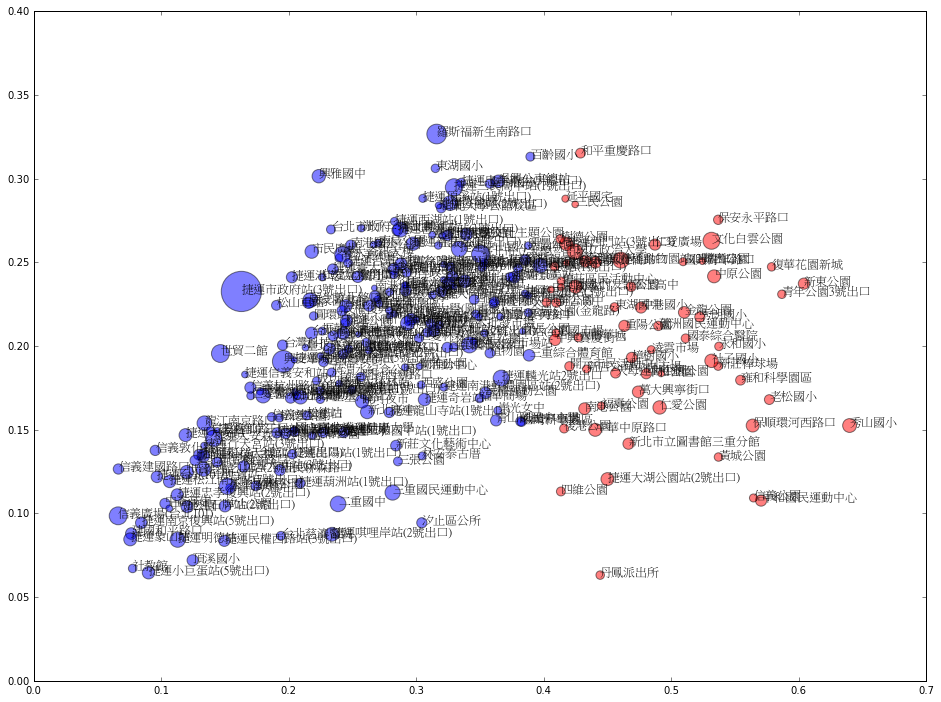

In [22]:


import numpy
plt.figure(figsize=(16,12))

site_dict = {}
tot_dict = {}


for data in udata:
    for site in data:
        if site['sna'] not in site_dict:
            site_dict[site['sna']] = []
            tot_dict[site['sna']] = float(site['tot']) # map the site to its total # of bikes
        site_dict[site['sna']].append( int(site['sbi'])/float(site['tot']) )

mean_list = []
std_list = []
tot_list = [] # for scatter size
color_list = []
label_list = []
        
for s, sdata in site_dict.items():
    mean_list.append(numpy.mean(sdata))
    std_list.append(numpy.std(sdata))
    tot_list.append(tot_dict[s]**2/20)
    if numpy.mean(sdata) > 0.4:
        color_list.append('r')
    else:
        color_list.append('b')
    label_list.append(s)
plt.scatter(mean_list, std_list, s=tot_list, c=color_list, alpha=0.5)


from matplotlib.font_manager import FontProperties
fpath = r"/library/Fonts/Microsoft/PMingLiU.ttf"
font = FontProperties(fname=fpath, size=12)

for i, s in enumerate(label_list):
    plt.annotate(s, 
                 xy=(mean_list[i], std_list[i]), 
                 fontproperties=font)

# plt.annotate('hahaha', xy=(0.25, 0.25))



### plotting sbis

In [ ]:
for x, y, l in zip(mean_list, cv_list, labels):
    plt.annotate(
        l,
        xy=(x, y),
        fontproperties=font)

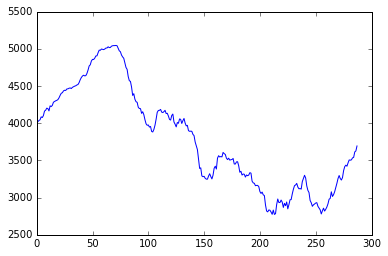

In [51]:
sbis = []
for tdata in udata:
    sbi_sum = 0
    for site in tdata:
        sbi_sum += int(site['sbi'])
#     print sbi_sum
    sbis.append(sbi_sum)
plt.plot(sbis)
plt.show()

### Changing x-axis

288


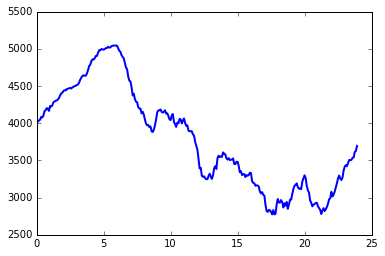

In [4]:
import numpy as np
print len(udata)

# Using sbi_list to store all sum of sbi
sbi_list = []
for tdata in udata:
    sbi_sum = 0
    for site in tdata:
        sbi_sum += int(site['sbi'])
    sbi_list.append(sbi_sum)

# Creating a list for new x-axis
xlist = []
for i in range(len(sbi_list)):
    xlist.append(i/12.0)

# plotting
plt.plot(xlist, sbi_list, '-', linewidth=2)
plt.show()

* 然而，你應該也發現了，X軸是到300，如果我今天希望把0~300mapping到0~23要怎麼做？
* 這時候你要查閱matplotlib怎麼改變X軸。你要google matplotlib plot。
* 查閱的結果發現plot()其實是要給兩個參數，一個是X軸的位置，一個是Y軸的位置，但上面的例子裡面我們只給了Y軸的資料，X軸則變成預設地從0開始。所以，我現在要把從0~287個時間點的值mapping至0~24，要怎麼做？其實就相當於把X軸的數字除以12即可，但記得要取浮點數。

In [23]:
import numpy
sna_to_sbis = {} #{'Taipower building': [3, 5, 6, 7, 8, 9, 10]}
sna_to_tots = {}
sna_to_fulls = {}
for tdata in udata:
    for site in tdata:
        if site['sna'] not in sna_to_sbis:
            sna_to_sbis[site['sna']] = []
            sna_to_tots[site['sna']] = int(site['tot']) # total number ...
        sna_to_sbis[site['sna']].append(int(site['sbi']))

mean_list = []
cv_list = []
tot_list = []
colors = []
labels = []
for k, v in sna_to_sbis.items():
    mean_list.append(numpy.mean(v))
    cv_list.append(numpy.std(v)/numpy.mean(v)*100)
    labels.append("%s%s"%(k,sna_to_tots[k]))
    tot_list.append(sna_to_tots[k]**2/10)
    

## 關於視覺化
* About matplotlib, plot.ly, ..., vs Excel
* Excel的視覺化會需要這麼做，那matplotlib也要做以下的事情。
    * 直接就資料繪圖
    * 調整X軸的scale
    * 調整Y軸的scale
    * 上X軸的的標籤
    * 標示資料點的名稱
* 利用Excel繪製資料的折線圖，是給一個Column的資料，通常對統計（SAS、Matlab）而言，就是一個變項的資料。而程式也是如此。在Excel要調整X軸的標籤或Scale，你也是給他一整個Column的標籤名稱，在寫程式的時候也是如此。
        matplotlib.pyplot.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

7.98611111111	80.7666479295	129	#FF6666
9.67361111111	83.8694115593	230	#FF6666
13.6875	94.3937462734	230	#FF6666
8.77777777778	77.5981373367	211	#FF6666
7.66319444444	66.841989032	193	#FF6666
10.2916666667	74.4488069658	102	#FF6666
8.62152777778	105.42677938	129	#FF6666
16.7118055556	44.2747396299	490	#FF6666
14.3194444444	104.804877961	435	#FF6666
19.6076388889	70.5972288896	336	#FF6666
8.37847222222	117.797034217	193	#FF6666
26.0972222222	26.7764347023	336	#6666FF
19.5590277778	93.7328711611	462	#FF6666
22.0972222222	38.1892611833	211	#FF6666
8.93402777778	75.131599423	115	#FF6666
3.05902777778	190.244291353	211	#FF6666
9.21180555556	83.1086527959	115	#FF6666
10.7777777778	104.724204953	250	#FF6666
23.1597222222	45.7754604932	250	#FF6666
8.84027777778	114.869893648	435	#FF6666
10.7326388889	54.4854283401	78	#FF6666
17.1666666667	54.8049437957	313	#FF6666
14.7465277778	50.7281824726	129	#FF6666
15.7430555556	54.7201563815	193	#FF6666
15.6076388889	42.9548221618	129	#FF6666
6.94791666

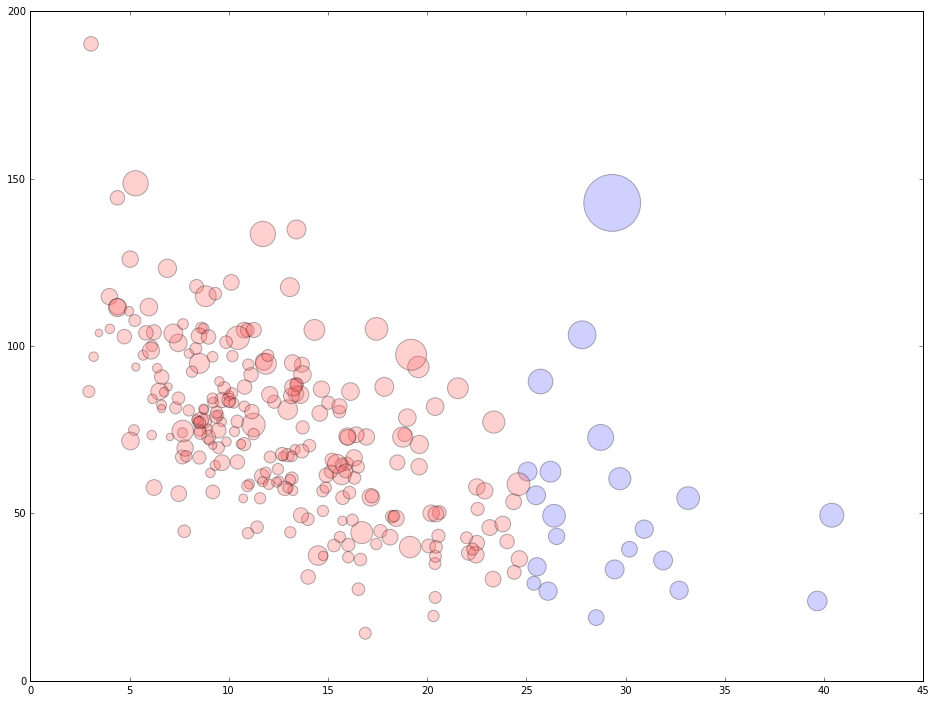

In [29]:
## print tot_list
## look up DOC of scatter
plt.figure(figsize=(16,12))
# plt.scatter(mean_list, cv_list, s = tot_list, c=colors, marker='o', alpha=0.3)

plt.show()
plt.close()

## plot.annotate() 
* 前面已經介紹了plot()和scatter()兩個繪圖方式，現在要介紹的是annotate()，是用來下文字描述的。
* annotate()和前面有很大的不同是，annotate一次只繪製一個點，而不像plot()和scatter()所給的，一次就是數個list。所以，若要繪製20個文字描述，那就要用for-each跑過這20個文字描述。
* 通常annotate()都是跟著plot()或scatter()等繪圖出現，不會自己出現。而matplotlib的繪布（canvas）大小通常也是隨著plot()或scatter()等調整，不會跟隨annotate()調整。所以你若單獨繪製annotate()，若x/y範圍值超過1的話，可能預設上都看不見。

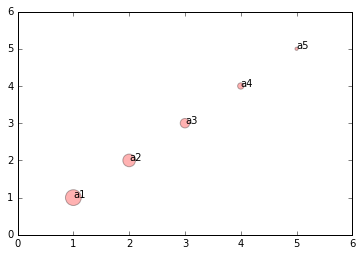

In [37]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]
sizes = [250, 160, 90, 40, 10]
label = ['a1', 'a2', 'a3', 'a4', 'a5']
plt.scatter(x, y, s=sizes, c='r', alpha=0.3)


# x, y, label with equal length
for i in range(len(x)):
    plt.annotate(label[i], xy=(x[i], y[i]))

plt.show()
plt.close()

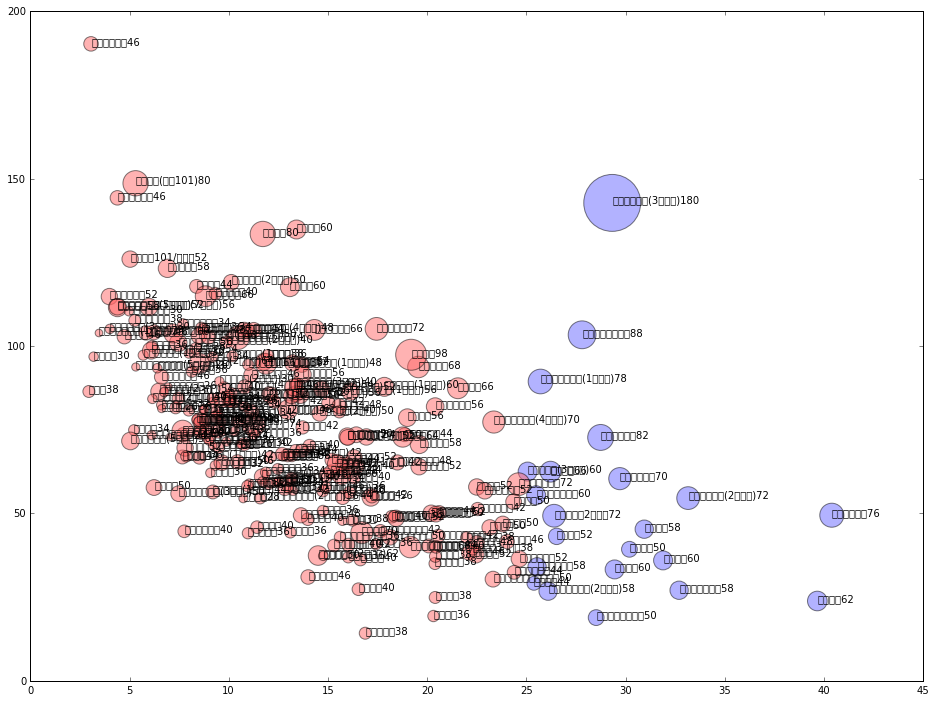

In [39]:
fig = plt.figure(1,figsize=(16, 12) ,  facecolor='w')
plt.scatter(mean_list, cv_list, s=tot_list, c=colors, alpha=0.5)

for i in range(len(mean_list)):
    plt.annotate(
        labels[i],
        xy=(mean_list[i], cv_list[i]))
    
plt.show()
plt.close()

### Trouble shooting 
* 若你在mac上遇到繪製中文有問題時，你可能會需要更改FontProperites

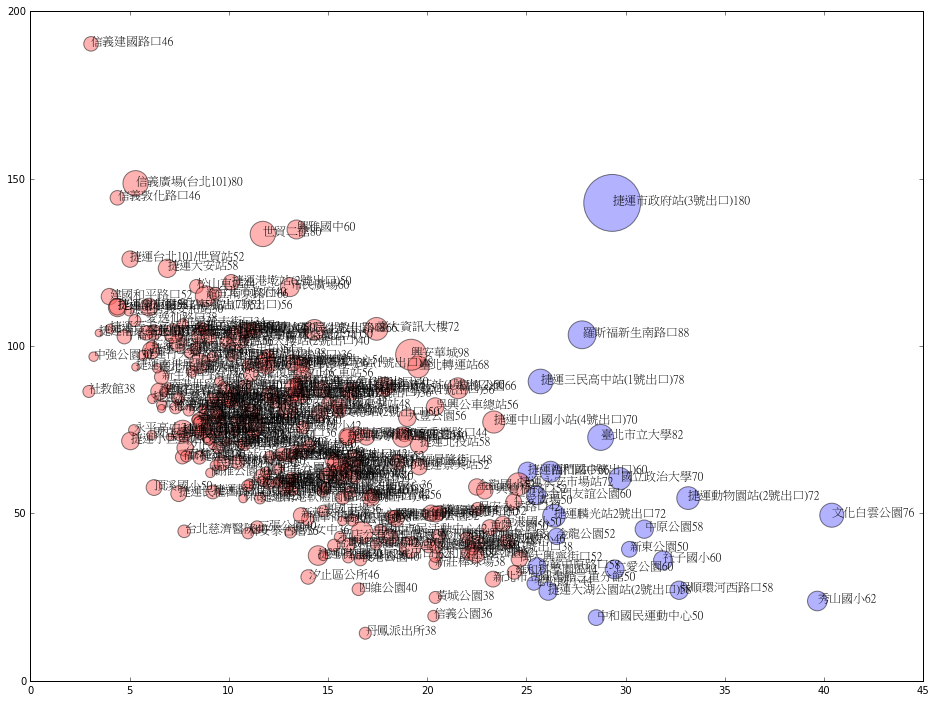

In [40]:
from matplotlib.font_manager import FontProperties

# next line for mac user
# font = FontProperties(fname=r"/library/Fonts/Microsoft/PMingLiU.ttf", size=12)

# next line for Window user
# font = FontProperties(fname=r"C:/Users/User/Dropbox/Programming/PSS/_data/PMingLiU.ttf", size=12)

# next line using os package to detect your OS
import os
if os.name == 'posix':
    fpath = r"/library/Fonts/Microsoft/PMingLiU.ttf"
else:
    fpath = r"C:/Users/User/Dropbox/Programming/PSS/_data/PMingLiU.ttf"
font = FontProperties(fname=fpath, size=12)

fig = plt.figure(1,figsize=(16, 12) ,  facecolor='w')
plt.scatter(mean_list, cv_list, s=tot_list, c=colors, alpha=0.5)

for x, y, l in zip(mean_list, cv_list, labels):
    plt.annotate(
        l,
        xy=(x, y),
        fontproperties=font)
plt.show()
plt.close()

In [43]:
for item in zip(mean_list, cv_list, labels):
    print item[0], item[1], item[2]

7.98611111111 80.7666479295 成功國宅36
9.67361111111 83.8694115593 松山家商48
13.6875 94.3937462734 捷運善導寺站(1號出口)48
8.77777777778 77.5981373367 捷運士林站(2號出口)46
7.66319444444 66.841989032 福林公園44
10.2916666667 74.4488069658 林森公園32
8.62152777778 105.42677938 市立美術館36
16.7118055556 44.2747396299 二重國中70
14.3194444444 104.804877961 民生敦化路口66
19.6076388889 70.5972288896 捷運北投站58
8.37847222222 117.797034217 松山車站44
26.0972222222 26.7764347023 捷運大湖公園站(2號出口)58
19.5590277778 93.7328711611 臺北轉運站68
22.0972222222 38.1892611833 中和公園46
8.93402777778 75.131599423 民生光復路口34
3.05902777778 190.244291353 信義建國路口46
9.21180555556 83.1086527959 考試院34
10.7777777778 104.724204953 國家圖書館50
23.1597222222 45.7754604932 重陽公園50
8.84027777778 114.869893648 龍江南京路口66
10.7326388889 54.4854283401 保長公園28
17.1666666667 54.8049437957 捷運奇岩站56
14.7465277778 50.7281824726 惠國市場36
15.7430555556 54.7201563815 植物園44
15.6076388889 42.9548221618 新店公有中央市場36
6.94791666667 87.8032241235 南港世貿公園26
10.0034722222 85.2090420611 臺北市客家文化主題公園32
20.40625 24.8930

In [10]:
sna_to_sbis = {}
sna_to_tots = {}
for tdata in udata:
    for site in tdata:
        if site['sna'] not in sna_to_sbis:
            sna_to_sbis[site['sna']] = []
            sna_to_tots[site['sna']] = []
        else:
            sna_to_sbis[site['sna']].append(int(site['sbi']))
            sna_to_tots[site['sna']].append(int(site['tot']))
print sna_to_tots

{u'\u6210\u529f\u570b\u5b85': [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 3

## C.V and Mean X/Y map
* by scatter
* C.V. = std/mean


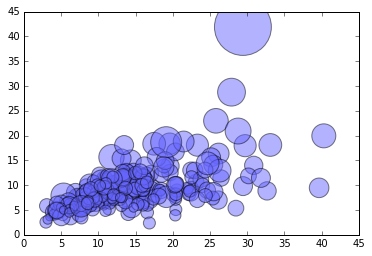

In [11]:
import numpy
x, y, area, colors, label = [], [], [], [], []
for sna in sna_to_sbis:
    x.append(numpy.mean(sna_to_sbis[sna]))
    y.append(numpy.std(sna_to_sbis[sna]))
#     area.append(sna_to_tots[sna]**2/10)
    tots = numpy.mean(sna_to_tots[sna])
    area.append(tots**2/10)
    colors.append('#6666FF')
    label.append(sna)
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
plt.close()

## print sbi for observation

In [44]:
for sna in sna_to_sbis.keys():
    print sna, ',',
print
print sna_to_sbis[u'信義建國路口']

成功國宅 , 松山家商 , 捷運善導寺站(1號出口) , 捷運士林站(2號出口) , 福林公園 , 林森公園 , 市立美術館 , 二重國中 , 民生敦化路口 , 捷運北投站 , 松山車站 , 捷運大湖公園站(2號出口) , 臺北轉運站 , 中和公園 , 民生光復路口 , 信義建國路口 , 考試院 , 國家圖書館 , 重陽公園 , 龍江南京路口 , 保長公園 , 捷運奇岩站 , 惠國市場 , 植物園 , 新店公有中央市場 , 南港世貿公園 , 臺北市客家文化主題公園 , 黃城公園 , 建國農安街口 , 捷運大直站(3號出口) , 永樂市場 , 捷運雙連站(2號出口) , 建國和平路口 , 松德公園 , 捷運象山站 , 金山市民路口 , 捷運國父紀念館站(2號出口) , 華西公園 , 捷運科技大樓站 , 南港國小 , 金龍國小 , 世貿二館 , 四維公園 , 捷運三和國中站(1號出口) , 東方科學園區 , 天母運動公園 , 臺北孔廟 , 中正基河路口 , 捷運昆陽站(1號出口) , 信義連雲街口 , 中崙高中 , 福華商場 , 文山行政中心 , 捷運景美站 , 新莊棒球場 , 捷運中山國小站(4號出口) , 捷運大安站 , 仁愛逸仙路口 , 仁愛公園 , 洲子二號公園 , 榮星花園 , 頂溪國小 , 樟樹國小 , 三民公園 , 南港車站 , 市民廣場 , 羅斯福寧波東街口 , 瑞光港墘路口 , 捷運中山站(4號出口) , 新生長安路口 , 社教館 , 瑠公公園 , 捷運芝山站(2號出口) , 捷運忠孝新生(3號出口) , 蘆洲國民運動中心 , 國立政治大學 , 蘭興公園 , 世貿三館 , 捷運三重站(3號出口) , 汐止公園 , 汐止區公所 , 捷運港墘站(2號出口) , 復華花園新城 , 臺大資訊大樓 , 華江高中 , 劍潭社區 , 捷運圓山站(2號出口) , 大鵬華城 , 後港公園 , 捷運六張犁站 , 捷運行天宮站(1號出口) , 捷運七張站(1號出口) , 捷運石牌站(2號出口) , 新生長春路口 , 玉成公園 , 陽光橋 , 信義廣場(台北101) , 五常公園 , 台北市政府 , 新生和平路口 , 民生活動中心 , 捷運民權西路站(3號出口) , 捷運動物園站(2號出口) , 捷運大安森林公園站 , 羅斯福景隆街口 , 汐止火車站 , 重陽國小 , 中興寶

In [49]:
print len(sna_to_sbis[u'信義建國路口'])
# print sna_to_sbis[u'信義建國路口']


288
0 [0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1]
1 [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2]
2 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
3 [1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1]
4 [1, 2, 3, 3, 2, 2, 1, 0, 0, 0, 2, 2]
5 [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
6 [1, 1, 2, 2, 4, 5, 5, 4, 6, 7, 8, 9]
7 [10, 11, 27, 27, 27, 27, 28, 25, 25, 24, 23, 23]
8 [25, 20, 18, 15, 4, 0, 1, 0, 2, 0, 0, 0]
9 [0, 3, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1]
10 [0, 1, 0, 0, 0, 0, 2, 2, 3, 3, 1, 1]
11 [1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0]
12 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
13 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 5]
14 [9, 7, 9, 6, 8, 12, 10, 12, 8, 9, 20, 22]
15 [22, 20, 12, 12, 4, 2, 0, 1, 0, 1, 1, 1]
16 [0, 3, 5, 5, 4, 0, 1, 1, 0, 1, 3, 0]
17 [1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0]
18 [3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2]
19 [0, 1, 0, 0, 0, 11, 11, 1, 0, 1, 1, 2]
20 [1, 4, 2, 0, 0, 1, 1, 2, 1, 0, 0, 6]
21 [0, 1, 0, 1, 0, 1, 3, 3, 8, 4, 1, 2]
22 [1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1]
23 [2, 0, 0, 0, 1, 3, 1, 1, 2, 3, 2, 0]


0 [28, 28, 32, 36, 36, 36, 41, 41, 41, 41, 43, 44]
1 [44, 44, 44, 44, 46, 46, 46, 45, 45, 45, 45, 45]
2 [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
3 [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
4 [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
5 [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44]
6 [44, 44, 44, 43, 43, 43, 43, 42, 41, 41, 41, 41]
7 [42, 42, 42, 40, 41, 40, 38, 37, 36, 38, 40, 45]
8 [46, 46, 44, 42, 42, 44, 43, 43, 45, 46, 46, 47]
9 [47, 47, 45, 45, 46, 47, 47, 48, 48, 49, 49, 49]
10 [49, 49, 47, 46, 45, 43, 43, 42, 42, 42, 42, 42]
11 [44, 44, 45, 46, 45, 45, 47, 45, 43, 40, 38, 39]
12 [41, 40, 41, 39, 40, 44, 44, 44, 44, 47, 47, 41]
13 [34, 33, 29, 27, 27, 22, 24, 24, 23, 16, 16, 12]
14 [8, 7, 3, 3, 0, 1, 0, 0, 0, 0, 1, 2]
15 [2, 1, 1, 0, 3, 1, 3, 3, 3, 3, 1, 0]
16 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]
17 [3, 3, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1]
18 [1, 1, 0, 0, 1, 1, 1, 4, 0, 1, 2, 2]
19 [4, 0, 0, 2, 5, 6, 7, 6, 7, 9, 7, 8]
20 [10, 10, 13, 16, 20, 22, 22, 28, 27, 23

## Calculating correlation between mean, cv, sbi, and tot

In [14]:
# mean_list, cv_list, s=tot_list
from scipy import stats
r, p = stats.pearsonr(mean_list, cv_list)
print "%.4f\t%.4f"%(r, p)


-0.5796	0.0000
